# Data Science and Business Analytics Internship

## Author: Charmi Daftari

## Task 3 - Prediction using Decision Tree Algorithm

Provided dataset: 'Iris.csv'

* Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### There are no missing values in the dataset.

In [4]:
df.drop('Id', axis=1, inplace=True)

## Performing Exploratory Data Analysis

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Data Visualization

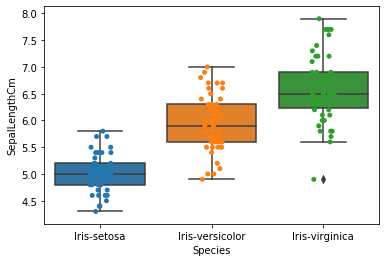

In [9]:
ax = sns.boxplot(x = 'Species', y = 'SepalLengthCm', data=df)
ax = sns.stripplot(x='Species', y='SepalLengthCm', data=df, jitter=True, edgecolor="gray")

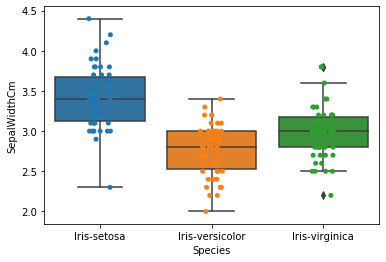

In [10]:
ax = sns.boxplot(x = 'Species', y = 'SepalWidthCm', data=df)
ax = sns.stripplot(x='Species', y='SepalWidthCm', data=df, jitter=True, edgecolor="gray")

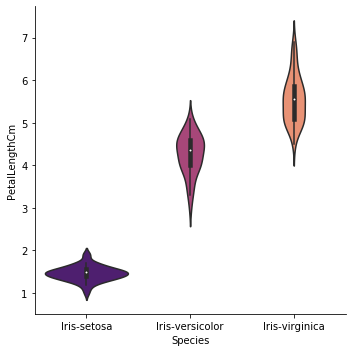

In [11]:
ax = sns.catplot(kind='violin', x = 'Species', y = 'PetalLengthCm', data=df, palette='magma', height=5)

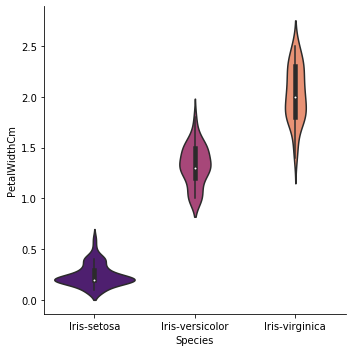

In [12]:
ax = sns.catplot(kind='violin', x = 'Species', y = 'PetalWidthCm', data=df, palette='magma', height=5)

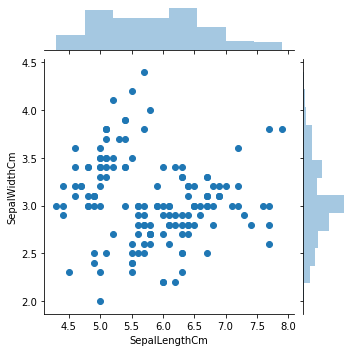

In [13]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, height=5)

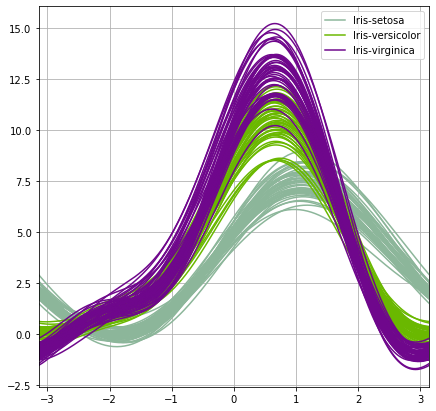

In [14]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(7,7))
andrews_curves(df, 'Species')

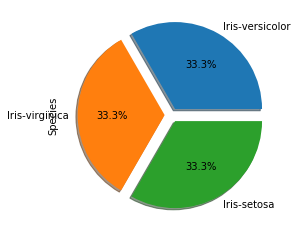

In [15]:
df['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.08,0.08,0.08])

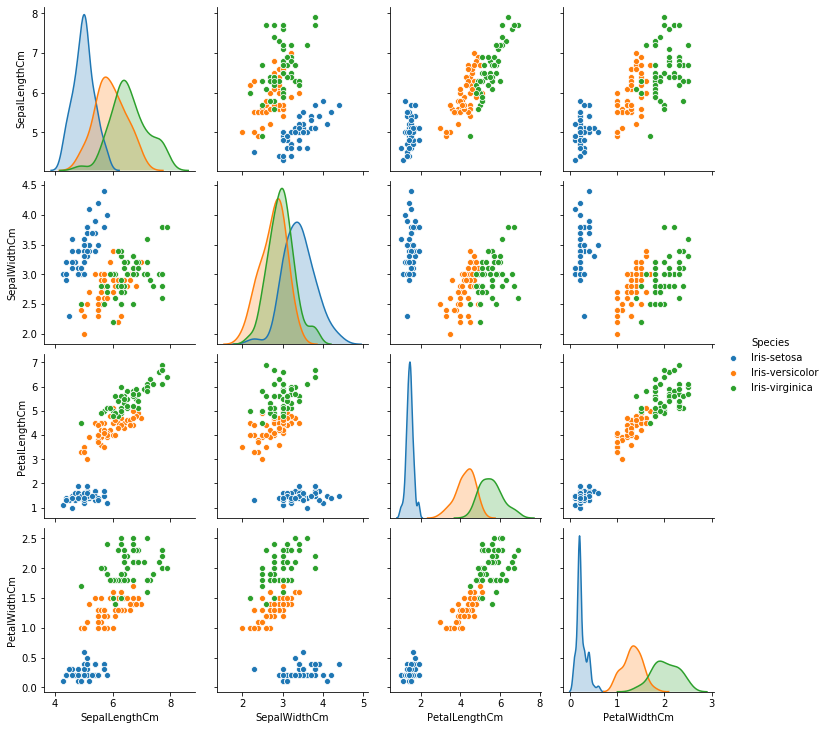

In [16]:
sns.pairplot(data=df, hue='Species')

## Data Preprocessing

In [17]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

## Splitting the dataset into Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

## Training the Decision Tree Classifier on the Training set

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predicting the Test set results and accuracy score

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_tree = classifier_tree.predict(X_test)
cm = confusion_matrix(Y_test, pred_tree)
print(cm)
accuracy_score(Y_test, pred_tree)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


0.9666666666666667

### Decision Tree Classifier model gives 97% accuracy score.